<Figure size 1280x800 with 0 Axes>

Text(Mar 1949, 147, 'Mar 1949')

Text(Nov 1949, 69, 'Nov 1949')

Text(Mar 1951, 193, 'Mar 1951')

Text(Nov 1951, 111, 'Nov 1951')

Text(Mar 1953, 251, 'Mar 1953')

Text(Feb 1954, 153, 'Feb 1954')

Text(Mar 1954, 250, 'Mar 1954')

Text(Feb 1956, 242, 'Feb 1956')

Text(Jul 1955, 379, 'Jul 1955')

Text(Nov 1957, 270, 'Nov 1957')

Text(Jul 1956, 428, 'Jul 1956')

Text(Apr 1959, 361, 'Apr 1959')

(50, 750)

([<matplotlib.axis.XTick at 0x257c74bb470>,
 <a list of 24 Text xticklabel objects>)

Text(0.5, 1.0, 'Peak and Troughs of Air Passengers Traffic (1949 - 1969)')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

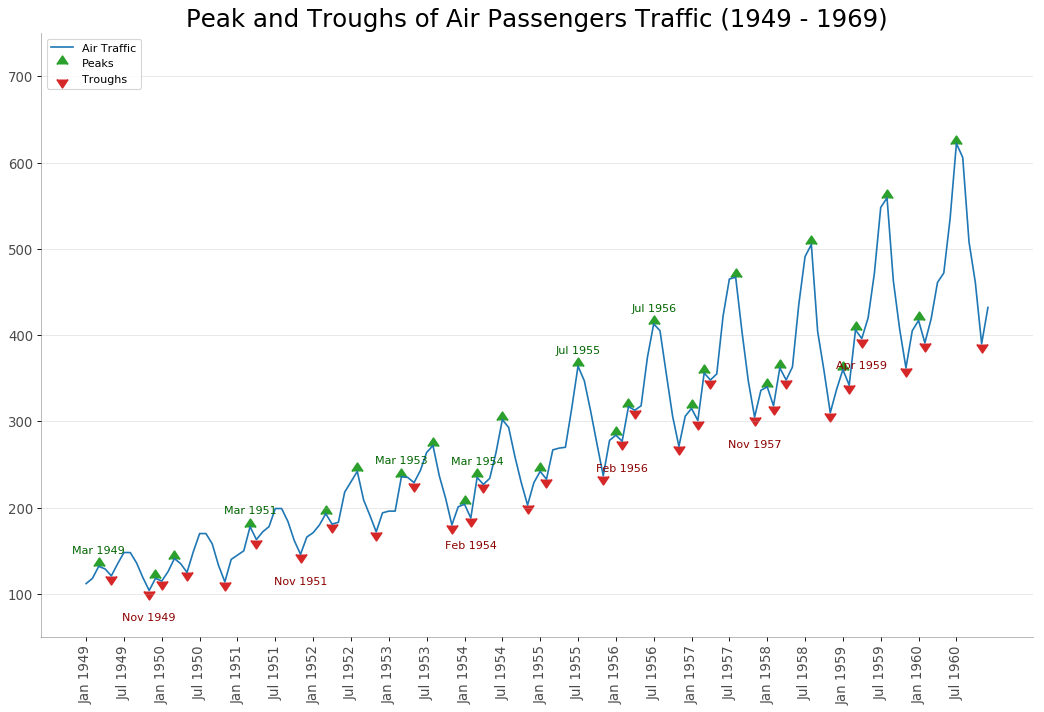

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.date[t], horizontalalignment='center', color='darkred')

plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()